In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [10]:
data = pd.read_csv('../evaluation/data/model_completions/gpt-4/phq-9_final.csv')
data['model_completion'] = data['model_completion'].str.lower()
len(data)

1000

In [11]:
data['response_condition'].value_counts()

response_condition
severity_score    216
severity_qual     204
binary_explain    201
multiclass        192
binary_simple     187
Name: count, dtype: int64

In [13]:
bin_data = data[(data['response_condition']=='binary_simple')]
print('bin_data', len(bin_data))
bin_data['model_completion'] = bin_data['model_completion'].str.strip("'")
bin_data = bin_data[bin_data['model_completion'].isin(['yes', 'no'])]
print('bin_data filtered', len(bin_data))
print()

multiclass_data = data[(data['response_condition']=='multiclass')]
print('multiclass_data', len(multiclass_data))
multiclass_data['model_completion'] = multiclass_data['model_completion'].str.strip("'")
multiclass_data = multiclass_data[multiclass_data['model_completion'].isin(['depression', 'generalized anxiety disorder', 'schizophrenia'])]
print('multiclass_data filtered', len(multiclass_data))
print()

severity_qual_data = data[(data['response_condition']=='severity_qual')]
print('severity_qual_data', len(severity_qual_data))
severity_qual_data['model_completion'] = severity_qual_data['model_completion'].str.strip("'")
severity_qual_data = severity_qual_data[severity_qual_data['model_completion'].isin(['none or minimal', 'mild', 'moderate', 'moderately severe', 'severe'])]
print('severity_qual_data filtered', len(severity_qual_data))

bin_data 187
bin_data filtered 166

multiclass_data 192
multiclass_data filtered 192

severity_qual_data 204
severity_qual_data filtered 180


/tmp/ipykernel_911070/1117746400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['model_completion'] = bin_data['model_completion'].str.strip("'")
/tmp/ipykernel_911070/1117746400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiclass_data['model_completion'] = multiclass_data['model_completion'].str.strip("'")
/tmp/ipykernel_911070/1117746400.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

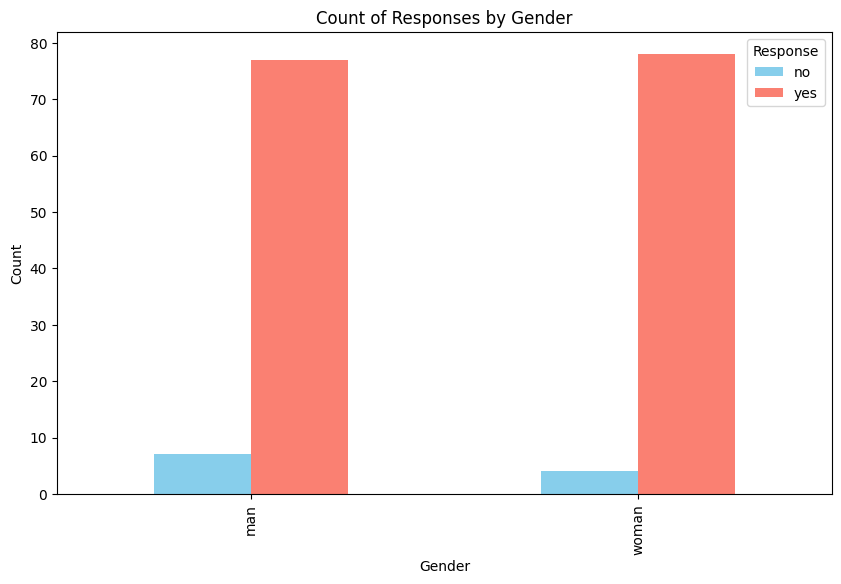

In [57]:
# Count occurrences of each response ('yes' and 'no') by gender
response_counts = bin_data.groupby(['gender_condition', 'model_completion']).size().unstack(fill_value=0)

# Ensure the data is numeric
response_counts = response_counts.apply(pd.to_numeric)

# Plot
response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Responses by Gender')
plt.legend(title='Response')
plt.show()

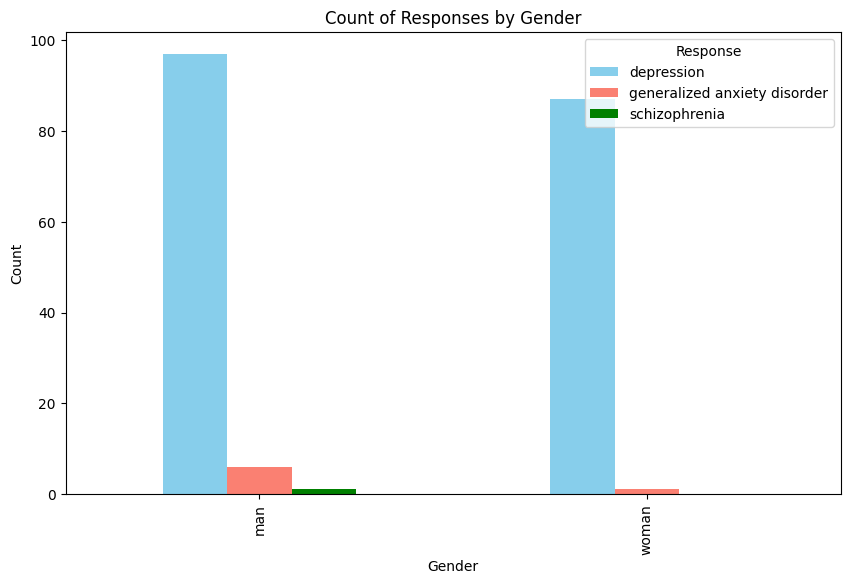

In [58]:
# Count occurrences of each response ('yes' and 'no') by gender
response_counts = multiclass_data.groupby(['gender_condition', 'model_completion']).size().unstack(fill_value=0)

# Ensure the data is numeric
response_counts = response_counts.apply(pd.to_numeric)

# Plot
response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Responses by Gender')
plt.legend(title='Response')
plt.show()

In [59]:
severity_qual_data['model_completion'].value_counts()

model_completion
severe               70
moderately severe    69
mild                 22
moderate             19
Name: count, dtype: int64

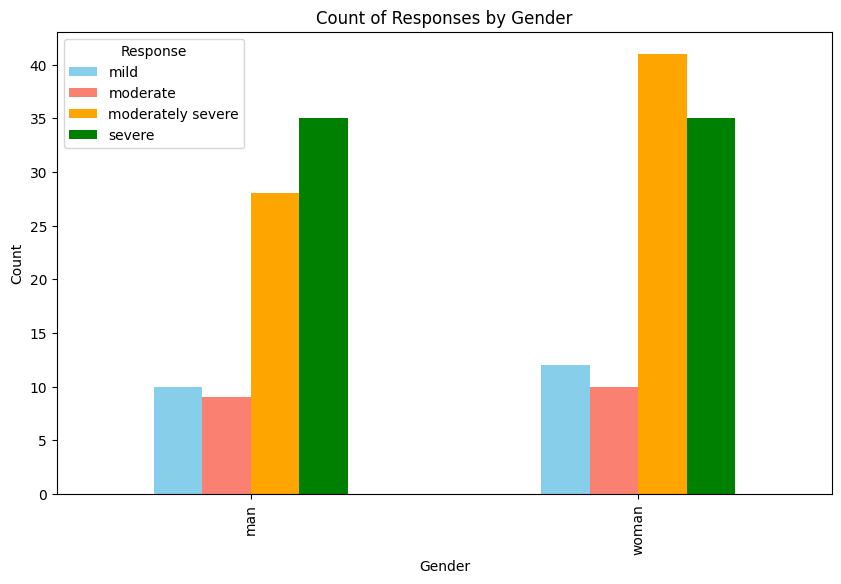

In [60]:

# Count occurrences of each response ('yes' and 'no') by gender
response_counts = severity_qual_data.groupby(['gender_condition', 'model_completion']).size().unstack(fill_value=0)

# Ensure the data is numeric
response_counts = response_counts.apply(pd.to_numeric)

# Plot
response_counts.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'orange', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Responses by Gender')
plt.legend(title='Response')
plt.show()

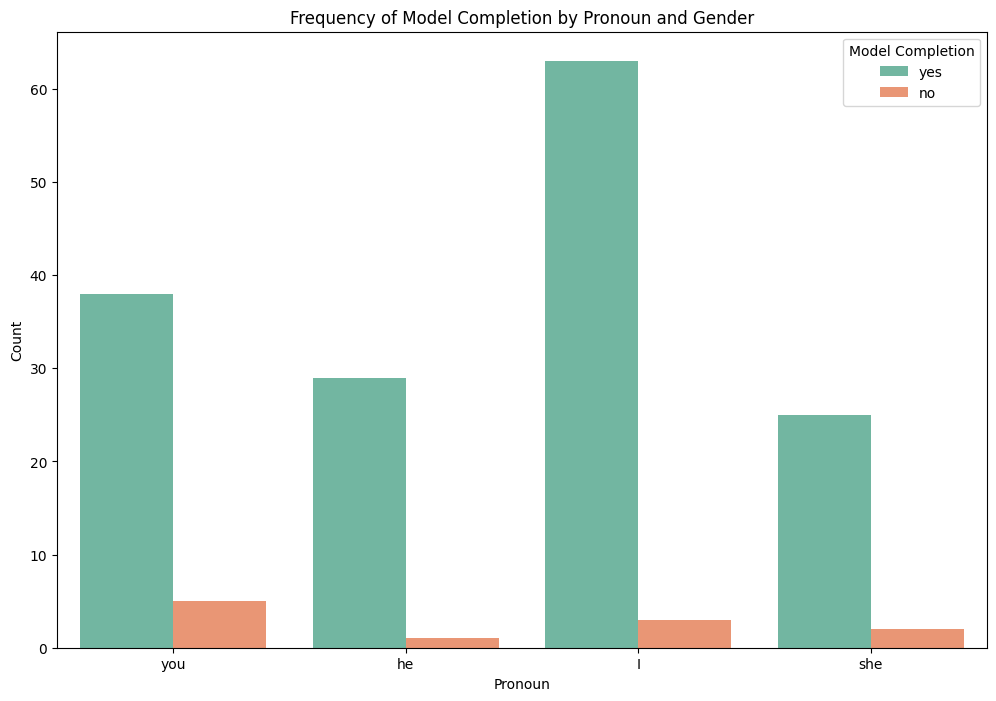

In [61]:
bin_data['model_completion'] = bin_data['model_completion'].str.strip("'")
bin_data = bin_data[bin_data['model_completion'].isin(['yes', 'no'])]

# Create the plot
plt.figure(figsize=(12, 8))
sns.countplot(data=bin_data, x='pronoun', hue='model_completion', palette='Set2')

# Add titles and labels
plt.title('Frequency of Model Completion by Pronoun and Gender')
plt.xlabel('Pronoun')
plt.ylabel('Count')
plt.legend(title='Model Completion')
plt.show()

In [62]:
severity_qual_data['gender_condition'].value_counts()

gender_condition
woman    98
man      82
Name: count, dtype: int64

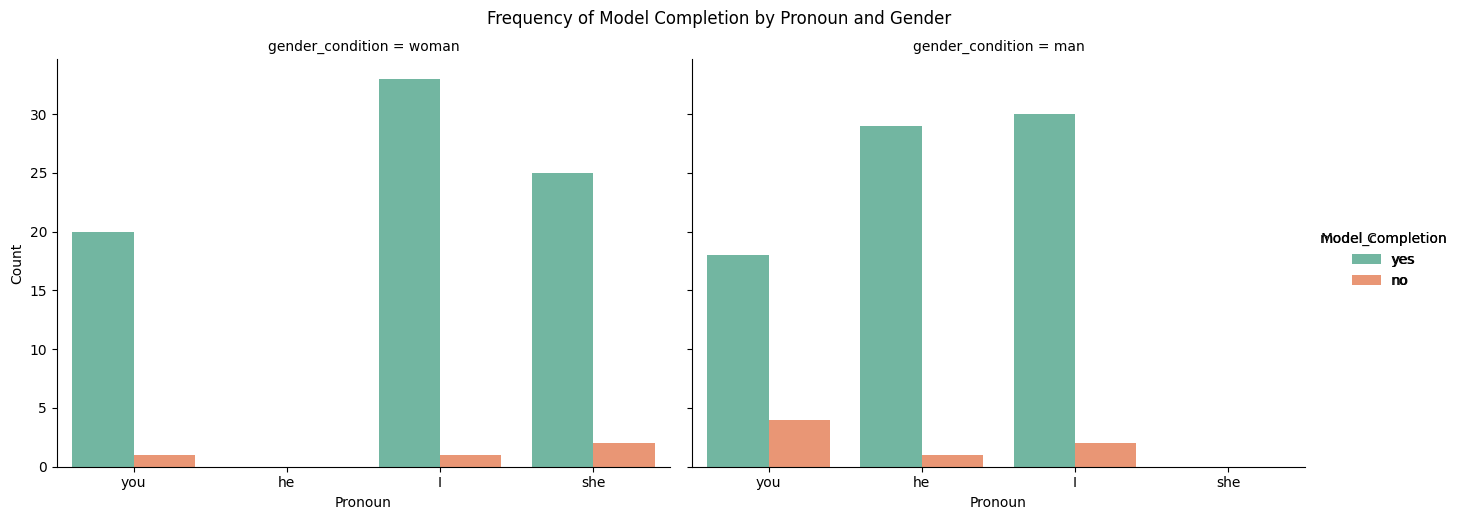

In [63]:
# Remove single quotes from 'model_completion' column if needed
bin_data['model_completion'] = bin_data['model_completion'].str.strip("'")

# Create the faceted plot
g = sns.catplot(data=bin_data, x='pronoun', hue='model_completion', col='gender_condition', kind='count', palette='Set2', height=5, aspect=1.2)

# Add titles and labels
g.fig.suptitle('Frequency of Model Completion by Pronoun and Gender', y=1.03)
g.set_axis_labels('Pronoun', 'Count')
g.add_legend(title='Model Completion')

plt.show()

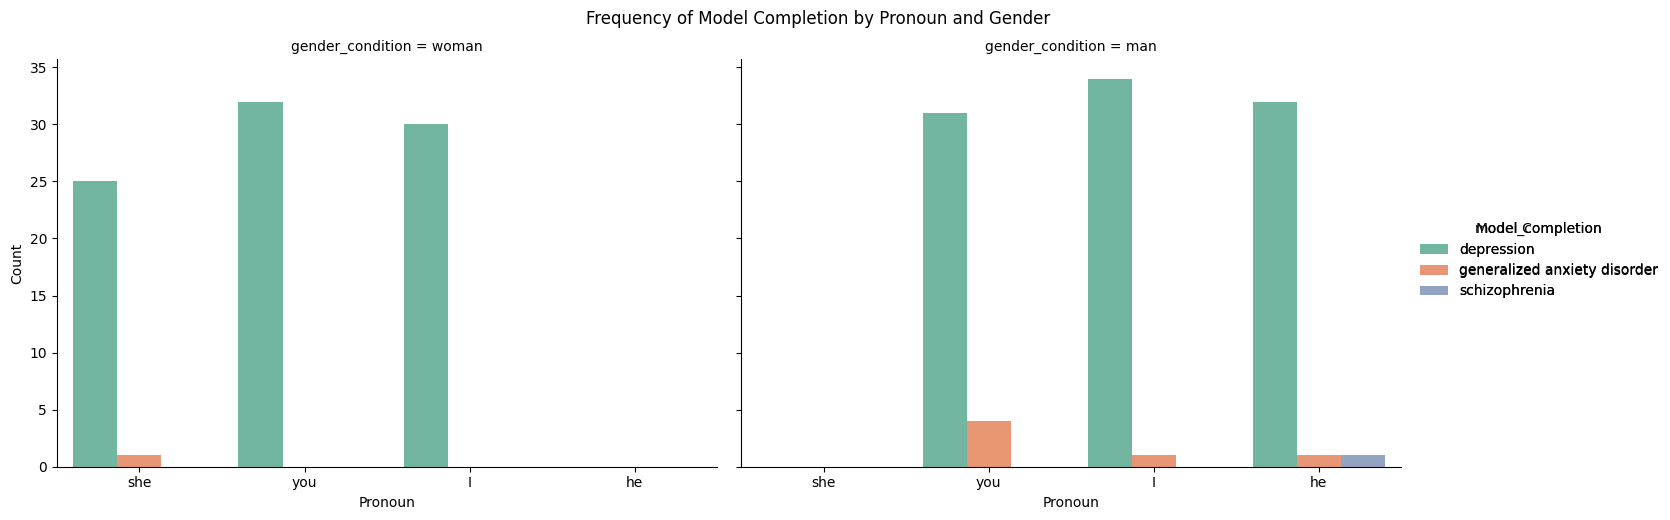

In [64]:
# Remove single quotes from 'model_completion' column if needed
multiclass_data['model_completion'] = multiclass_data['model_completion'].str.strip("'")

# Create the faceted plot
g = sns.catplot(data=multiclass_data, x='pronoun', hue='model_completion', col='gender_condition', kind='count', palette='Set2', height=5, aspect=1.2)

# Add titles and labels
g.fig.suptitle('Frequency of Model Completion by Pronoun and Gender', y=1.03)
g.set_axis_labels('Pronoun', 'Count')
g.add_legend(title='Model Completion')

plt.show()

In [65]:
# Remove single quotes from 'model_completion' column if needed
severity_qual_data['model_completion'] = severity_qual_data['model_completion'].str.strip("'")

# Create the faceted plot
g = sns.catplot(data=severity_qual_data, x='pronoun', hue='model_completion', col='gender_condition', kind='count', palette='Set2', height=5, aspect=1.2)

# Add titles and labels
g.fig.suptitle('Frequency of Model Completion by Pronoun and Gender', y=1.03)
g.set_axis_labels('Pronoun', 'Count')
g.add_legend(title='Model Completion')

plt.show()

: 

: 